# Implementation of Partner Selection Procedures

## Abstract

In this paper[1], Stubinger, Mangold and Krauss  developed  a  multivariate  statistical  arbitrage  strategy  based  on  vine  copulas  -  a  highly flexible instrument for linear and nonlinear multivariate dependence modeling. Pairs trading is a relative-value arbitrage strategy, where an investor seeks to profit from mean-reversion properties of the price spread between two co-moving securities. Existing literature focused on using  bivariate  copulas  to  model the dependence structure between two stock return time series, and to identify mispricings that can potentially be exploited in a pairs trading application. 

This paper proposes a multivariate copula-based statistical arbitrage framework, where specifically, for each stock in the S&P 500 data base, the three most suitable partners are selected by leveraging different selection criteria. Then, the multivariate copula models are benchmarked to capture the dependence structure of the selected quadruples. Later on, the paper focusses on the generation of trading signals and backtesting.


## Introduction

This notebook will focus on the various Partner Selection procedures and their implementations, as described in the paper. For every stock in the S&P 500, a partner triple is identified based on adequate measures of association. The following four partner selection approaches are implemented :
- Traditional Approach - baseline approach where the high dimensional relation between the four stocks is approximated by their pairwise bivariate correlations via Spearman’s $\rho$;
- Extended Approach - calculating the multivariate version of Spearman’s $\rho$ based on Schmid and Schmidt (2007)[2];
- Geometric Approach - involves calculating the sum of euclidean distances from the 4-dimensional hyper-diagonal;
- Extremal Approach - involves calculating a non-parametric $\chi^2$ test statistic based on Mangold (2015)[3] to measure the degree of deviation from independence.

Firstly, all measures of association are calculated using the ranks of the daily discrete returns of our samples. Ranked transformation provides robustness against outliers. Secondly, only the top 50 most highly correlated stocks are taken into consideration for each target stock, to reduce the computational burden.

---

# Preprocessing

In [5]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [6]:
from partner_selection import PartnerSelection
from ps_utils import get_sector_data
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Loading the data set

Dataset contains daily pricing data for all stocks in S&P 500. Data from the year 2016 is taken into consideration for this notebook.

When a PartnerSelection object is created, daily returns of the stocks and their corresponding ranked returns are calculated and stored as attributes. 

In [7]:
df = pd.read_csv('./data/data.csv', parse_dates=True, index_col='Date').dropna()
df = df['2019-01-01':'2019-12-31'] #Taking 12 month data as mentioned in the paper
ps = PartnerSelection(df)

constituents = pd.read_csv('./data/constituents-detailed.csv', index_col='Symbol')

In [8]:
print(ps.top_50_correlations)

        0     1      2     3     4     5     6     7     8     9   ...    40   
A      TMO   PKI    WAT   MTD   DHR   ABT   HON  ISRG  HOLX   BSX  ...  MCHP  \
AAL    UAL   LUV    DAL   ALK   FDX   CCL    GS    CE   URI   TEL  ...  FAST   
AAP   ORLY   AZO    GPC   HCA   BEN   CMI   HON   PNR   UHS  TSCO  ...   TDY   
AAPL   APH  GOOG  GOOGL  MCHP  INTC  SWKS  MSFT  AMZN   TXN  MXIM  ...   HON   
ABBV   PFE  AMGN      A  ALXN   TMO  GILD   DHR   PKI   IQV  VRTX  ...   BLK   
...    ...   ...    ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
YUM    MCD  VRSK     WM  SBUX   ECL   RSG  CINF   ZTS    ES   BSX  ...   HIG   
ZBH    SYK   BAX    MDT   ABT    EW   STE  HOLX   DHR   BSX   RMD  ...   ROP   
ZBRA  KEYS  TROW   CDNS  NVDA   FLS  ANSS  SNPS   ETN   TXN   BLK  ...   AMD   
ZION   CMA  PBCT     RF  SIVB  FITB   CFG  HBAN   KEY   MTB   BAC  ...   BLK   
ZTS    MRK  IDXX    PFE   BSX   DHR  VRSN   LLY   ABT   SYK   TMO  ...   MMC   

        41    42   43    44    45    46

# Step 1 : Traditional Approach

- Calculate the sum of all pairwise correlations for all possible quadruples, consisting of a fixed target stock.
- Quadruple with the largest sum of pairwise correlations is considered as the final quadruple and saved to the output matrix.

In [ ]:
Q = ps.traditional_multiprocess(20)
print(Q)
ps.plot_selected_pairs(Q)

In [ ]:
for quadruple in Q:
    display(get_sector_data(quadruple,constituents))

In [ ]:
#Plotting measures of all quadruples for a given target
ps.plot_all_target_measures(target='A', procedure='traditional')

# Step 2 : Extended Approach

- Calculate the multivariate version of Spearman’s $\rho$ for all possible quadruples, consisting of a fixed target stock.
- Quadruple with the largest value is considered as the final quadruple and saved to the output matrix.

In [ ]:
Q = ps.extended_multiprocess(20)
print(Q)
ps.plot_selected_pairs(Q)

In [ ]:
for quadruple in Q:
    display(get_sector_data(quadruple,constituents))

In [ ]:
#Plotting measures of all quadruples for a given target
ps.plot_all_target_measures(target='A', procedure='extended')

# Step 3 : Geometric Approach

- Calculate the four dimensional diagonal measure for all possible quadruples, consisting of a fixed target stock.
- Quadruple with the smallest diagonal measure is considered as the final quadruple and saved to the output matrix.

In [ ]:
Q = ps.geometric_multiprocess(20)
print(Q)
ps.plot_selected_pairs(Q)

In [ ]:
for quadruple in Q:
    display(get_sector_data(quadruple,constituents))

In [ ]:
#Plotting measures of all quadruples for a given target
ps.plot_all_target_measures(target='A', procedure='geometric')

# Step 4 : Extremal Approach

- Calculate the $\chi^2$ test statistic for all possible quadruples, consisting of a fixed target stock.
- Quadruple with the largest test statistic is considered as the final quadruple and saved to the output matrix.

['A', 'TMO', 'PKI', 'DHR']
['AAL', 'UAL', 'DAL', 'ALK']
['AAP', 'GPC', 'PNR', 'DOV']
['AAPL', 'GOOG', 'GOOGL', 'MSFT']
['ABBV', 'A', 'TMO', 'DHR']
['ABC', 'MCK', 'CAH', 'WBA']
['ABMD', 'ISRG', 'ABT', 'BSX']
['ABT', 'BSX', 'SYK', 'ISRG']
['ACN', 'MA', 'V', 'VRSN']
['ADBE', 'MSFT', 'MA', 'V']
['ADI', 'MXIM', 'TXN', 'MCHP']
['ADM', 'PRU', 'LNC', 'UNM']
['ADP', 'MA', 'V', 'VRSN']
['ADSK', 'MSFT', 'MA', 'V']
['AEE', 'CMS', 'LNT', 'XEL']
['AEP', 'XEL', 'CMS', 'LNT']
['AES', 'AEE', 'XEL', 'WEC']
['AFL', 'L', 'GL', 'MET']
['AIG', 'MET', 'LNC', 'PRU']
['AIV', 'UDR', 'AVB', 'EQR']
[['A', 'TMO', 'PKI', 'DHR'], ['AAL', 'UAL', 'DAL', 'ALK'], ['AAP', 'GPC', 'PNR', 'DOV'], ['AAPL', 'GOOG', 'GOOGL', 'MSFT'], ['ABBV', 'A', 'TMO', 'DHR'], ['ABC', 'MCK', 'CAH', 'WBA'], ['ABMD', 'ISRG', 'ABT', 'BSX'], ['ABT', 'BSX', 'SYK', 'ISRG'], ['ACN', 'MA', 'V', 'VRSN'], ['ADBE', 'MSFT', 'MA', 'V'], ['ADI', 'MXIM', 'TXN', 'MCHP'], ['ADM', 'PRU', 'LNC', 'UNM'], ['ADP', 'MA', 'V', 'VRSN'], ['ADSK', 'MSFT', 'MA', 'V'], 

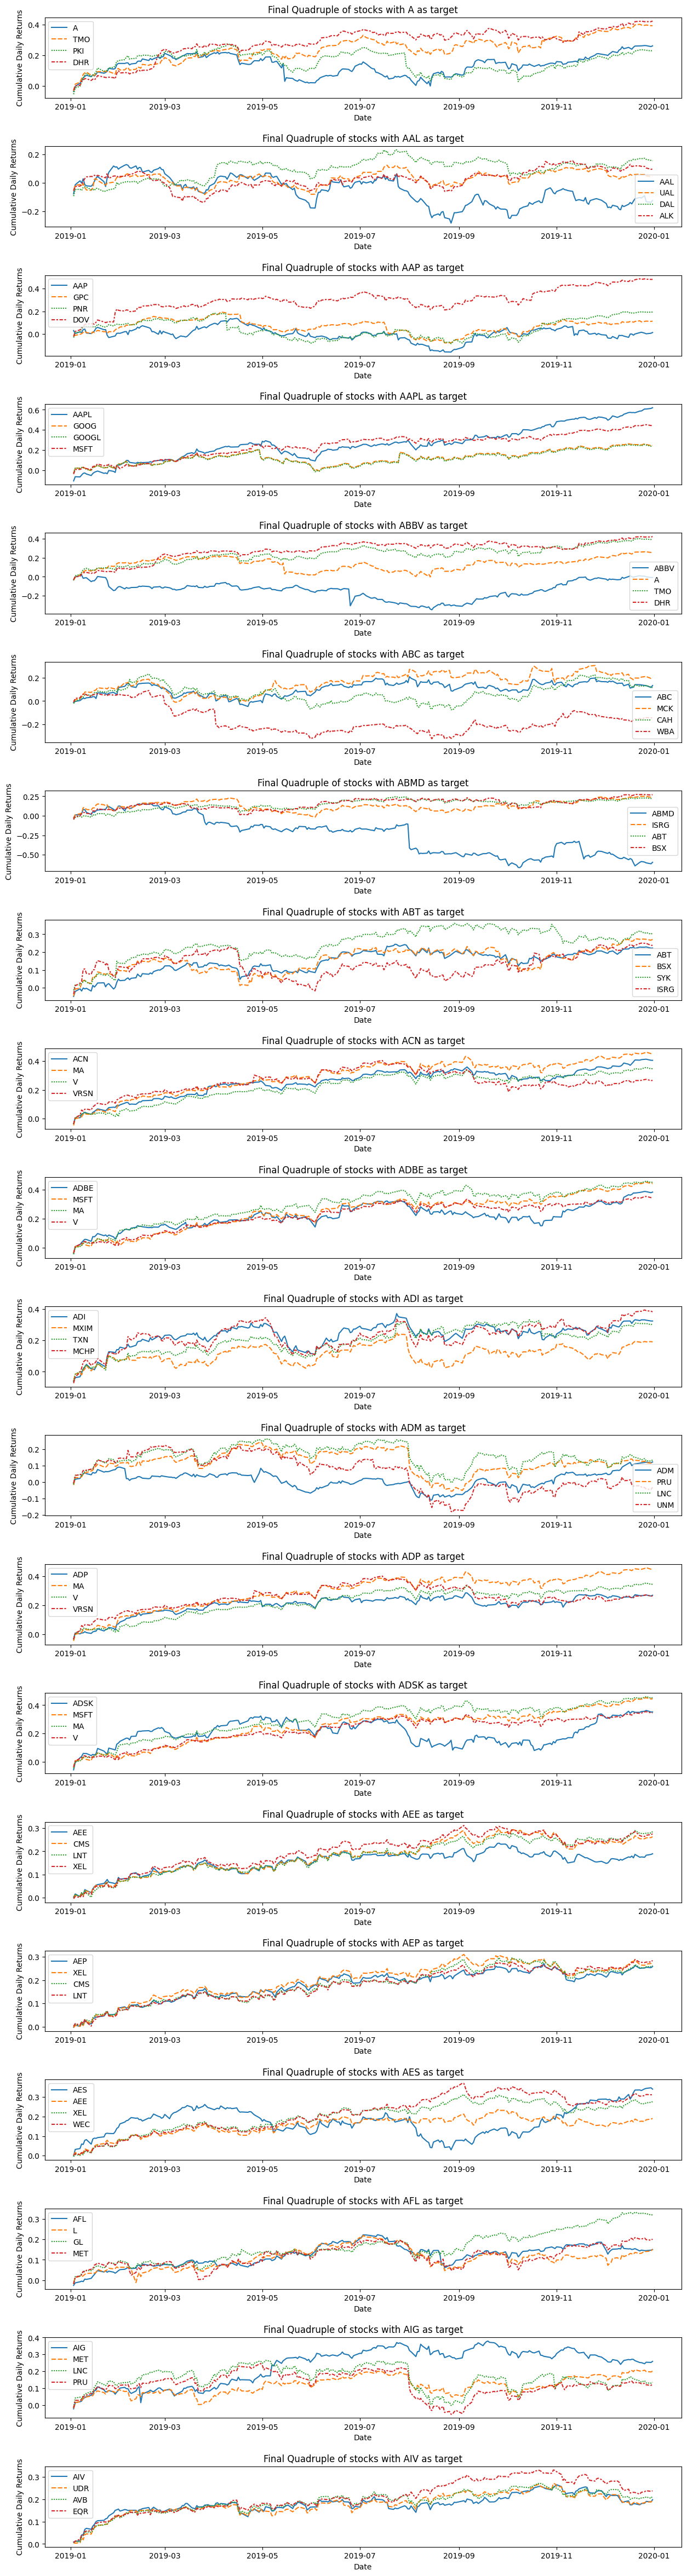

In [9]:
Q = ps.extremal(20)
print(Q)
ps.plot_selected_pairs(Q)

In [10]:
for quadruple in Q:
    display(get_sector_data(quadruple,constituents))

,Security,GICS Sector,GICS Sub-Industry
Symbol,,,
A,Agilent Technologies,Health Care,Health Care Equipment
TMO,Thermo Fisher Scientific,Health Care,Life Sciences Tools & Services
PKI,PerkinElmer,Health Care,Health Care Equipment
DHR,Danaher Corp.,Health Care,Health Care Equipment


,Security,GICS Sector,GICS Sub-Industry
Symbol,,,
AAL,American Airlines Group,Industrials,Airlines
UAL,United Airlines Holdings,Industrials,Airlines
DAL,Delta Air Lines Inc.,Industrials,Airlines
ALK,Alaska Air Group Inc,Industrials,Airlines


,Security,GICS Sector,GICS Sub-Industry
Symbol,,,
AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail
GPC,Genuine Parts,Consumer Discretionary,Specialty Stores
PNR,Pentair plc,Industrials,Industrial Machinery
DOV,Dover Corporation,Industrials,Industrial Machinery


,Security,GICS Sector,GICS Sub-Industry
Symbol,,,
AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals"
GOOG,Alphabet Inc. (Class C),Communication Services,Interactive Media & Services
GOOGL,Alphabet Inc. (Class A),Communication Services,Interactive Media & Services
MSFT,Microsoft Corp.,Information Technology,Systems Software


,Security,GICS Sector,GICS Sub-Industry
Symbol,,,
ABBV,AbbVie Inc.,Health Care,Pharmaceuticals
A,Agilent Technologies,Health Care,Health Care Equipment
TMO,Thermo Fisher Scientific,Health Care,Life Sciences Tools & Services
DHR,Danaher Corp.,Health Care,Health Care Equipment


,Security,GICS Sector,GICS Sub-Industry
Symbol,,,
ABC,AmerisourceBergen Corp,Health Care,Health Care Distributors
MCK,McKesson Corp.,Health Care,Health Care Distributors
CAH,Cardinal Health Inc.,Health Care,Health Care Distributors
WBA,Walgreens Boots Alliance,Consumer Staples,Drug Retail


,Security,GICS Sector,GICS Sub-Industry
Symbol,,,
ABMD,Abiomed,Health Care,Health Care Equipment
ISRG,Intuitive Surgical Inc.,Health Care,Health Care Equipment
ABT,Abbott Laboratories,Health Care,Health Care Equipment
BSX,Boston Scientific,Health Care,Health Care Equipment


,Security,GICS Sector,GICS Sub-Industry
Symbol,,,
ABT,Abbott Laboratories,Health Care,Health Care Equipment
BSX,Boston Scientific,Health Care,Health Care Equipment
SYK,Stryker Corp.,Health Care,Health Care Equipment
ISRG,Intuitive Surgical Inc.,Health Care,Health Care Equipment


,Security,GICS Sector,GICS Sub-Industry
Symbol,,,
ACN,Accenture plc,Information Technology,IT Consulting & Other Services
MA,Mastercard Inc.,Information Technology,Data Processing & Outsourced Services
V,Visa Inc.,Information Technology,Data Processing & Outsourced Services
VRSN,Verisign Inc.,Information Technology,Internet Services & Infrastructure


,Security,GICS Sector,GICS Sub-Industry
Symbol,,,
ADBE,Adobe Inc.,Information Technology,Application Software
MSFT,Microsoft Corp.,Information Technology,Systems Software
MA,Mastercard Inc.,Information Technology,Data Processing & Outsourced Services
V,Visa Inc.,Information Technology,Data Processing & Outsourced Services


,Security,GICS Sector,GICS Sub-Industry
Symbol,,,
ADI,"Analog Devices, Inc.",Information Technology,Semiconductors
MXIM,Maxim Integrated Products Inc,Information Technology,Semiconductors
TXN,Texas Instruments,Information Technology,Semiconductors
MCHP,Microchip Technology,Information Technology,Semiconductors


,Security,GICS Sector,GICS Sub-Industry
Symbol,,,
ADM,Archer-Daniels-Midland Co,Consumer Staples,Agricultural Products
PRU,Prudential Financial,Financials,Life & Health Insurance
LNC,Lincoln National,Financials,Multi-line Insurance
UNM,Unum Group,Financials,Life & Health Insurance


,Security,GICS Sector,GICS Sub-Industry
Symbol,,,
ADP,Automatic Data Processing,Information Technology,Data Processing & Outsourced Services
MA,Mastercard Inc.,Information Technology,Data Processing & Outsourced Services
V,Visa Inc.,Information Technology,Data Processing & Outsourced Services
VRSN,Verisign Inc.,Information Technology,Internet Services & Infrastructure


,Security,GICS Sector,GICS Sub-Industry
Symbol,,,
ADSK,Autodesk Inc.,Information Technology,Application Software
MSFT,Microsoft Corp.,Information Technology,Systems Software
MA,Mastercard Inc.,Information Technology,Data Processing & Outsourced Services
V,Visa Inc.,Information Technology,Data Processing & Outsourced Services


,Security,GICS Sector,GICS Sub-Industry
Symbol,,,
AEE,Ameren Corp,Utilities,Multi-Utilities
CMS,CMS Energy,Utilities,Multi-Utilities
LNT,Alliant Energy Corp,Utilities,Electric Utilities
XEL,Xcel Energy Inc,Utilities,Multi-Utilities


,Security,GICS Sector,GICS Sub-Industry
Symbol,,,
AEP,American Electric Power,Utilities,Electric Utilities
XEL,Xcel Energy Inc,Utilities,Multi-Utilities
CMS,CMS Energy,Utilities,Multi-Utilities
LNT,Alliant Energy Corp,Utilities,Electric Utilities


,Security,GICS Sector,GICS Sub-Industry
Symbol,,,
AES,AES Corp,Utilities,Independent Power Producers & Energy Traders
AEE,Ameren Corp,Utilities,Multi-Utilities
XEL,Xcel Energy Inc,Utilities,Multi-Utilities
WEC,WEC Energy Group,Utilities,Electric Utilities


,Security,GICS Sector,GICS Sub-Industry
Symbol,,,
AFL,Aflac,Financials,Life & Health Insurance
L,Loews Corp.,Financials,Multi-line Insurance
GL,Globe Life Inc.,Financials,Life & Health Insurance
MET,MetLife Inc.,Financials,Life & Health Insurance


,Security,GICS Sector,GICS Sub-Industry
Symbol,,,
AIG,American International Group,Financials,Property & Casualty Insurance
MET,MetLife Inc.,Financials,Life & Health Insurance
LNC,Lincoln National,Financials,Multi-line Insurance
PRU,Prudential Financial,Financials,Life & Health Insurance


None

In [34]:
#Plotting measures of all quadruples for a given target
ps.plot_all_target_measures(target='A', procedure='extremal')
#Plotting the correlation matrix heatmap of all stocks on S&P 500
ps.plot_correlation()

KeyboardInterrupt: 

In [15]:
# Export quadruples to list for more fun
cols = ['col'+str(x) for x in range(len(Q[0]))]
export_quadruples = pd.DataFrame(Q, columns=cols)
export_quadruples.to_csv('./quadruples.csv', index=False)


# Conclusion

This notebook describes the proposed Partner Selection Framework, also showcasing example usage of the implemented framework.

The first three procedures seem to generate the same final set of quadruples for every target stock in the universe. Another important takeaway is the Industry/Sub-Sector of the stocks in most of the final quadruples are highly correlated, even though clustering methods were not used in this framework.

Some Interesting Observations:
- ABC(AmerisourceBergen Corp) which is a Health Care Distibutor seems to have highly correlated partners in Financial Services. This observation holds true for all four approaches.
- For ABT(Abbott Laboratories), a Health Care Equipment Manufacturer, Extremal Approach returned three partners which are in Financial Services. This behaviour is against the results obtained from the other three approaches.
- According to all four approaches, ADM(Archer-Daniels-Midland Co) an Agricultural Products business, seems to have highly correlated partners in Asset Management.  


# References
[1]. Stübinger, Johannes; Mangold, Benedikt; Krauss, Christopher. Statistical Arbitrage with Vine Copulas. Available at: https://www.econstor.eu/bitstream/10419/147450/1/870932616.pdf

[2]. Schmid, F., Schmidt, R., 2007. Multivariate extensions of Spearman’s rho and related statis-tics. Statistics & Probability Letters 77 (4), 407–416.

[3]. Mangold, B., 2015. A multivariate linear rank test of independence based on a multipara-metric copula with cubic sections. IWQW Discussion Paper Series, University of Erlangen-N ̈urnberg. Available at: https://www.statistik.rw.fau.de/files/2016/03/IWQW-10-2015.pdf
